### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

---

In [3]:
!pip install user_agents ip2geotools

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 5.0.2 requires docutils<0.19,>=0.14, but you have docutils 0.21.2 which is incompatible.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/587.4 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/587.4 kB ? eta -:--:--
   ---------------------------------------- 587.4/587.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 2.0 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.7 MB 2.2 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.7 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.7 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.7 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.7 M

In [95]:
!pip install geopy


In [97]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
df = pd.read_csv(r"C:\Users\sande\Downloads\archive (3)\uber.csv")
df

In [ ]:
# Understand Data
df.drop(["Unnamed: 0", "key"], axis=1, inplace=True)
df

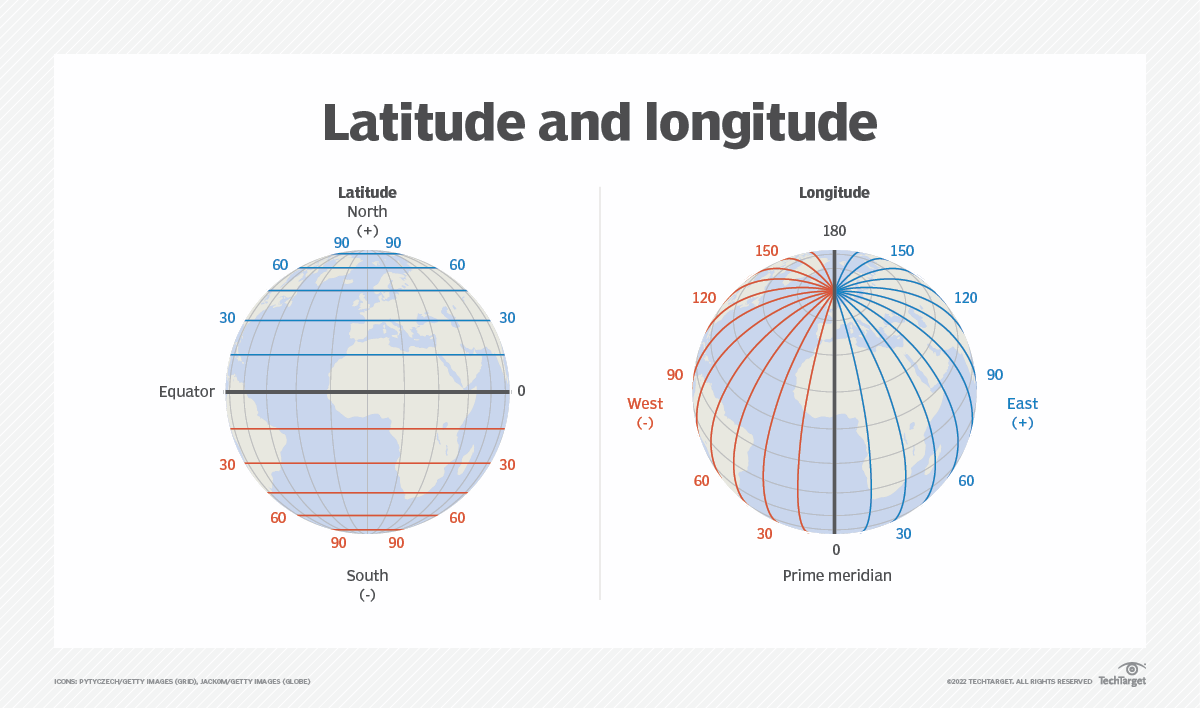

In [ ]:
# check dtypes
df.info()
# pickup_datetime -> datetime

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

In [ ]:
# Extract Features
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df

In [ ]:
def get_season(arg): # month=1
    if arg in [12, 1, 2]:
        return "Winter"
    elif arg in [3, 4, 5]:
        return "Spring"
    elif arg in [6, 7, 8]:
        return "Summer"
    else: # 9 10 11
        return "Autumn"
    
df['pickup_season'] = df['pickup_month'].apply(get_season)
df

In [ ]:
def get_dayperiod(arg): # hour=1
    if arg > 5 and arg < 12:
        return "Morning"
    elif arg >= 12 and arg < 17:
        return "Afternoon"
    elif arg >= 17 and arg < 22:
        return "Evenning"
    else: # 22 -> 5
        return "Night"
    
df['pickup_period'] = df['pickup_hour'].apply(get_dayperiod)
df

In [ ]:
# describe num
df.describe()
# fare_amout < 0? & fare_amount == 499?
# longitude: -180 -> 180
# lat: -90 -> 90
# passenger_count = 0? & passenger_count = 208?

In [ ]:
# Fare_amount <= 0
df[df['fare_amount'] <= 0]

In [ ]:
drop_fare_indices = df[df['fare_amount'] <= 0].index
df.drop(drop_fare_indices, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

In [ ]:
# longitude: btn -180 -> 180
# latitude: btn -90 -> 90
# passenger_count = 208 and min=0?

In [ ]:
df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]

In [ ]:
# longitude: btn -180 -> 180
# latitude: btn -90 -> 90

df = df[
    (df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)
    &
    (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)
    &
    (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)
    &
    (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)
    ]
df

In [ ]:
# passenger_count = 208?

df['passenger_count'].unique()

In [ ]:
df[df['passenger_count'] > 6]

In [ ]:
drop_count_index = df[df['passenger_count'] > 6].index
df.drop(drop_count_index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

In [ ]:
# passenger_count = 0?
df[df['passenger_count'] <= 0]

In [ ]:
drop_count_index = df[df['passenger_count'] <= 0].index
df.drop(drop_count_index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

In [ ]:
df.describe()

In [ ]:
df[df['fare_amount'] < 1] # see distance

In [ ]:
# cat_describe
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

In [ ]:
for col in cat_cols:
    print(f"count of uniques of \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

# Extract Features + EDA

In [ ]:
df

In [ ]:
location_1 = ("40.738354", "-73.999817") # (lat, lon)
location_2 = ("40.723217", "-73.999512") # (lat, lat)
great_circle(location_1, location_2).km

In [ ]:
# Extract Features: (distance - pickupcity - dropoffcity)
def get_distance(row):
    location_1 = (row['pickup_latitude'], row['pickup_longitude'])
    location_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(location_1, location_2).km # (lat, lon)

df['distance'] = df.apply(get_distance, axis=1)
df['distance']

## Calculate the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy
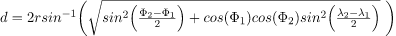

In [ ]:
def haversine_distance(lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [ ]:
df['haversine_distance'] = haversine_distance(df['pickup_longitude'],df['dropoff_longitude'], df['pickup_latitude'],df['dropoff_latitude'])
df['haversine_distance'] # not so accuracte as Radius of eath is now 6378.009 so we will drop it 

In [ ]:
df[['distance', 'haversine_distance']]

In [ ]:
((df['distance'] - df['haversine_distance']) * 1000).describe() # distance in meters

In [ ]:
df['distance'].describe() # it doesnt matter on the scale of the data, so lets try modeling useing distance first then try 'haversine_distance'
# why s distance 8782 km??
# why s distance 0 km??

In [ ]:
sns.scatterplot(x=df['distance'], y=df['fare_amount'])
plt.xlim([0, 100])

In [ ]:
# why s distance 8782 km??

df[df['distance'] > 600] # there is alot of noise / wrong data from sensors reading
# (we have to handle them before sending it to ml)

In [ ]:
# is distances btn 35 -> 45km have resonable fare_amount?
df[(df['distance'] > 35) & (df['distance'] < 45)]

In [ ]:
# distance > 60 km doesnt have meaningfull fare_amount so drop them
df[df['distance'] > 60] # 477 rows are nothing

In [ ]:
indices = df[df['distance'] > 60].index # 477 rows are nothing
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
# distance = 0?
df[df['distance'] == 0] # 5k from 200k data and wrong values then remove them

In [ ]:
indices = df[df['distance'] == 0].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.describe()

* Drop Large Fare with Small Distance

* Drop Small Fare with Large Distance

In [ ]:
# fare < 1?
df[df['fare_amount'] <= 1]

In [ ]:
df[(df['fare_amount'] < 1) & (df['distance'] > 1)]

In [ ]:
indices = df[(df['fare_amount'] < 1) & (df['distance'] > 1)].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df[(df['fare_amount'] > 100) & (df['distance'] < 1)] # drop them

In [ ]:
indices = df[(df['fare_amount'] > 100) & (df['distance'] < 1)].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.describe()

In [ ]:
df

In [ ]:
# Extract location name features
geocoder = Nominatim(user_agent="Get city") # lat, lon
result = geocoder.reverse("40.740770,-74.005043")
result

In [ ]:
result.raw

In [ ]:
result = geocoder.reverse("40.73854,-73.999817")
result.raw

In [ ]:
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'])

In [ ]:
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude']) # Antarctica
plt.xlim([40, 42])
plt.ylim([-72, -75])

In [ ]:
df[(df['pickup_longitude'] > 40) & (df['pickup_longitude'] < 42) & (df['pickup_latitude'] > -75) & (df['pickup_latitude'] < -73)]

In [ ]:
lat = -73.982127					
lon = 40.746760	
result = geocoder.reverse(f"{lat}, {lon}") # at Antarctica	??!!!
result

In [ ]:
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'])
plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [ ]:
df[(df['pickup_latitude'] > -1) & (df['pickup_latitude'] < 1) & (df['pickup_longitude'] > -1) & (df['pickup_longitude'] < 1)]

In [ ]:
lat = 0.007380		
lon = 0.001782		
result = geocoder.reverse(f"{lat}, {lon}") # at atlantic ocean ?!!
result

In [ ]:
# to read images
import cv2
img = cv2.imread("new_york_city.png") # numpy array
type(img)

In [ ]:
import cv2
img = cv2.imread("/kaggle/input/images/new_york_city.png") # numpy array
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img, extent=[-75, -73, 39, 42], aspect='auto')

sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude']) # data is from 3 countries lets get city and country level
plt.xlim([-75, -73])
plt.ylim([39, 42])
plt.show()

In [ ]:
import cv2
img = cv2.imread("/kaggle/input/images/new_york_city.png") # numpy array
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img, extent=[-75, -73, 39, 42], aspect='auto')

sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'], alpha=0.1) # data is from 3 countries lets get city and country level
plt.xlim([-75, -73])
plt.ylim([40, 41])

In [ ]:
# remove those wrong places
antercatica_indices = df[(df['pickup_longitude'] > 40) & (df['pickup_longitude'] < 42) & (df['pickup_latitude'] > -75) & (df['pickup_latitude'] < -73)].index
ocean_indices = df[(df['pickup_latitude'] > -1) & (df['pickup_latitude'] < 1) & (df['pickup_longitude'] > -1) & (df['pickup_longitude'] < 1)].index

df.drop(antercatica_indices, axis=0, inplace=True)
df.drop(ocean_indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

In [ ]:
geocoder = Nominatim(user_agent="Get city") # lat, lon

def get_pickup_location(row):
    result = geocoder.reverse(f"{row['pickup_latitude']},{row['pickup_longitude']}")
    adress_type = None
    # country = None
    if type(result) != type(None):
        result = result.raw
        adress_type = result['addresstype']
        # country = result['address']['city']
        print(adress_type)
    return adress_type

def get_dropoff_location(row):
    result = geocoder.reverse(f"{row['dropoff_latitude']},{row['dropoff_longitude']}")
    adress_type = None
    # country = None
    if type(result) != type(None):
        result = result.raw
        adress_type = result['addresstype']
        # country = result['address']['country']
        print(adress_type)
    return adress_type

## This step will take a long time so I skipped it on my pc, but try it if you have good network
# df['pickup_adress_type'] = df.apply(get_pickup_location, axis=1)
# df['dropoff_adress_type'] = df.apply(get_dropoff_location, axis=1)
# df[['pickup_adress_type', 'dropoff_adress_type']]

In [ ]:
df.describe()

## EDA

In [ ]:
df.hist()

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
num_cols

In [ ]:
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()

In [ ]:
has_outliers = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for col in has_outliers:
    sns.boxplot(x=df[col])
    plt.show()

In [ ]:
cat_cols = df.select_dtypes(include='O').columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    if df[col].nunique() < 7:
        dff = df.groupby(col)[['fare_amount']].count().reset_index().sort_values(by='fare_amount', ascending=False)
        plt.pie(labels=dff[col], x=dff['fare_amount'], autopct="%1.1f%%")
    elif df[col].nunique() < 50:
        sns.countplot(x=df[col])
    else: # > 50 get top 10
        dff = df.groupby(col)[['fare_amount']].count().reset_index().sort_values(by='fare_amount', ascending=False).head(10)
        sns.countplot(x=dff[col])

    plt.show()

In [ ]:
# bi-variate analysis
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [ ]:
dff = df.groupby("pickup_year")[['fare_amount']].mean().reset_index().sort_values(by='pickup_year')
dff

In [ ]:
# How Fare Change with time?
px.line(x=dff['pickup_year'], y=dff['fare_amount'])

In [ ]:
# which weekday have largest fare
sns.barplot(x=df['pickup_weekday'], y=df['fare_amount'], estimator=np.mean)

In [ ]:
sns.barplot(x=df['pickup_season'], y=df['fare_amount'], estimator=np.mean)

In [ ]:
sns.barplot(x=df['pickup_period'], y=df['fare_amount'], estimator=np.mean)

In [ ]:
sns.barplot(x=df['pickup_hour'], y=df['fare_amount'], estimator=np.mean) # 5 AM is the highest fare

In [ ]:
# is there correlation btn distance and fare
sns.scatterplot(x=df['distance'], y=df['fare_amount'])

In [ ]:
sns.scatterplot(x=df['distance'], y=df['fare_amount'], size=df['passenger_count'])

In [ ]:
# more questions

In [ ]:
# Multivariate analysis
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
sns.pairplot(df[num_cols]) # un-corrleated features

# Pre-Processing

In [ ]:
# remove un-nessacry features
df.drop(["pickup_datetime"], axis=1, inplace=True)
df

In [ ]:
# check dublicates
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

In [ ]:
df.isna().sum() # no outliers at target column

In [ ]:
# split data

# remove haversine_distance as no big diffrence then try again after modeling
# remove un-nessacry features from X

X = df.drop(["fare_amount", "haversine_distance", 'pickup_longitude', "pickup_latitude", "dropoff_longitude", 'dropoff_latitude'], axis=1)
# X = df.drop(["fare_amount", "haversine_distance", 'distance', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_season', 'pickup_period'], axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
X_train

In [ ]:
X_train.shape, X_test.shape # 20k is more than enough to test the model

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1] 
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self # always return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X
    
h_lb_ub = Handle_outliers_lb_ub()
h_lb_ub

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):  # always return self
        # calculate what is needed to make .transform()
        # self.mean_ = np.mean(x)
        self.n_features_in_ = x.shape[1] 
        return self # always return self
    
    def transform(self, x, y=None):
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)
    
log_transformer = LogTransfomer()
log_transformer

In [ ]:
sns.histplot(X_train['distance'])

In [ ]:
rbs_scaler = RobustScaler()
data = rbs_scaler.fit_transform(X_train[['distance']])
sns.histplot(data)

In [ ]:
data_logged = log_transformer.fit_transform(X_train[['distance']])
sns.histplot(data_logged)

In [ ]:
sns.boxplot(x=data_logged['distance'])

In [ ]:
rbs_scaler = RobustScaler()
data_logged = rbs_scaler.fit_transform(data_logged)
sns.histplot(data_logged)

In [ ]:
sns.boxplot(data_logged)

In [ ]:
# make pipeline

# cat1: passenger_count, pickup_year, pickup_month, pickup_weekday, pickup_hour => categorical encoded data
# cat2: pickup_season => OHE, pickup_period => OHE
# num: distance => right-skewed / outliers / 0 -> 53km
# num2: pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude => impute + scaling_robust
# target: fare_amount => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

cat_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])

num_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', RobustScaler())
])

target_pipeline = Pipeline(steps=[
    ('handle_outliers', LogTransfomer())
])

preprocessing = ColumnTransformer(transformers=[
    ("cat_no_change", cat_1_pipeline, ['passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour']),
    ("cat_pipe", cat_2_pipeline, ['pickup_season', 'pickup_period']),
    ("num_pipeline", num_pipeline, ['distance']),
    # ("num_2_pipeline", num_2_pipeline, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']),
])

preprocessing

# Modeling

* 1) Make Simple Model

* 2) Get validation accuracy to invstigate:
        - Underfitting vs Overfitting (bias - variance tradeoff)

* 3) Hyperparameters tunning (using GridSearchCV or RandomizedSearchCV)

* 4) Get Test Score & confidence interval

* 5) save model

* 6) put it in backend (streamlit / flaskapp)

# 1) Make Simple Model

In [ ]:
# 1) Make Simple Model
lr_model = LinearRegression() # train_accuracy = 14.6% with lat and lon without distance feature 

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = lr_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {lr_model.score(X_train_preprocessed, y_train_preprocessed)}") # r2_score
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}") # mean_square_fare

In [ ]:
lr_model.coef_

# 2) Get validation accuracy to invstigate

In [ ]:
# 2) Get validation accuracy to invstigate
# (Underfitting vs Overfitting (bias - variance tradeoff))

valid_losses = -1 * cross_val_score(LinearRegression(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(LinearRegression(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

### Underfitting: let's try polynomial regression

In [ ]:
# make pipeline

# cat1: passenger_count, pickup_year, pickup_month, pickup_weekday, pickup_hour => categorical encoded data
# cat2: pickup_season => OHE, pickup_period => OHE
# num: distance => right-skewed / outliers / 0 -> 53km
# target: fare_amount => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

cat_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])


target_pipeline = Pipeline(steps=[
    ('handle_outliers', LogTransfomer())

])

poly_preprocessing = ColumnTransformer(transformers=[
    ("cat_no_change", cat_1_pipeline, ['passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour']),
    ("cat_pipe", cat_2_pipeline, ['pickup_season', 'pickup_period']),
    ("num_pipeline", num_pipeline, ['distance']),
])

poly_preprocessing

In [ ]:
target_pipeline

In [ ]:
poly_lr_model = LinearRegression()

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

poly_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = poly_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {poly_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

In [ ]:
poly_lr_model.coef_

In [ ]:
X_train_preprocessed_poly.shape

# 2) Get validation accuracy to invstigate Underfitting or Overfitting

In [ ]:
# 2) Get validation accuracy to invstigate
# (Underfitting vs Overfitting (bias - variance tradeoff))

valid_losses = -1 * cross_val_score(LinearRegression(), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(LinearRegression(), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

### let's try regularization (to see lasso and elasticnet remove un-nessacry feature and see if it helps)

In [ ]:
ridge_lr_model = Ridge(alpha=0.05, random_state=42)

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

ridge_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = ridge_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {ridge_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

In [ ]:
ridge_lr_model.coef_

In [ ]:
valid_losses = -1 * cross_val_score(Ridge(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(Ridge(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
## lasso
lasso_lr_model = Lasso(alpha=0.05, random_state=42)

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lasso_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = lasso_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {lasso_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

In [ ]:
lasso_lr_model.coef_

In [ ]:
valid_losses = -1 * cross_val_score(Lasso(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(Lasso(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
# elasticnet
elasticnet_lr_model = ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42)  

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

elasticnet_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = elasticnet_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {elasticnet_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

In [ ]:
elasticnet_lr_model.coef_

In [ ]:
valid_losses = -1 * cross_val_score(ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

### let's try Stocastic Gradient Descent without poly features first to determine if it overfit or underfit

In [ ]:
sgd_model = SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42)

X_train_copy = X_train[:10000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
y_train_copy = y_train[:10000]
X_train_preprocessed = preprocessing.fit_transform(X_train_copy)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))

sgd_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = sgd_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {sgd_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

In [ ]:
valid_losses = -1 * cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
# Solution of Overfitting
sgd_model = SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=300, alpha=0.05, penalty='l2', random_state=42)

X_train_copy = X_train[:10000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
y_train_copy = y_train[:10000]
X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train_copy)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))

sgd_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = sgd_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {sgd_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

In [ ]:
valid_losses = -1 * cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

## Try out more complex models to solve underfitting

In [ ]:
from sklearn.linear_model import LinearRegression,SGDRegressor, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
rf_model = RandomForestRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

rf_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = rf_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {rf_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(RandomForestRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(RandomForestRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
gb_model = GradientBoostingRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

gb_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = gb_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {gb_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(GradientBoostingRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(GradientBoostingRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
svr_model = SVR()

X_train_copy = X_train[:10000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
y_train_copy = y_train[:10000]
X_train_preprocessed = preprocessing.fit_transform(X_train_copy)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))

svr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = svr_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {svr_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(SVR(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(SVR(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
dt_model = DecisionTreeRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

dt_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = dt_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {dt_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(DecisionTreeRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(DecisionTreeRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

In [ ]:
knn_model = KNeighborsRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

knn_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = knn_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {knn_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(KNeighborsRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(KNeighborsRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

# 3) Hyperparameters tunning on 5 Models you think will work best


**(using GridSearchCV or RandomizedSearchCV)**

In [ ]:
lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", LinearRegression())
    ])

lr_pipeline

In [ ]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
lr_grid = GridSearchCV(lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
lr_grid.fit(X_train, y_train_preprocessed)

In [ ]:
lr_grid.best_score_

In [ ]:
lr_grid.best_params_

In [ ]:
ridge_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", Ridge(alpha=0.01, random_state=42))
    ])

ridge_lr_pipeline

In [ ]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
ridge_grid = GridSearchCV(ridge_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train_preprocessed)

In [ ]:
ridge_grid.best_score_

In [ ]:
ridge_grid.best_params_

In [ ]:
lasso_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", Lasso(alpha=0.01, random_state=42))
    ])

lasso_lr_pipeline

In [ ]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
lasso_grid = GridSearchCV(lasso_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train_preprocessed)

In [ ]:
lasso_grid.best_score_

In [ ]:
lasso_grid.best_params_

In [ ]:
elasticnet_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", ElasticNet(alpha=0.01, l1_ratio=0.05, random_state=42))
    ])

elasticnet_lr_pipeline

In [ ]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
elasticnet_grid = GridSearchCV(elasticnet_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train_preprocessed)

In [ ]:
elasticnet_grid.best_score_

In [ ]:
elasticnet_grid.best_params_

In [ ]:
sgd_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=300, alpha=0.05, penalty='elasticnet', random_state=42))
    ])

sgd_lr_pipeline

In [ ]:
# GridSearch SGD took large time so I stopped it
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

X_train_copy = X_train[:10000] 
y_train_copy = y_train[:10000]
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))
sgd_lr_grid = GridSearchCV(sgd_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
sgd_lr_grid.fit(X_train_copy, y_train_preprocessed)

In [ ]:
sgd_lr_grid.best_score_

In [ ]:
sgd_lr_grid.best_params_

# 4) Test Accuracy

**Test on Polynomial Regression as it's the best model**

In [ ]:
y_train_pred = lr_grid.predict(X_train)
y_test_pred = lr_grid.predict(X_test)

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))

print(f"Train Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
print("*" * 50)
print(f"Test Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Test Loss: {mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)}")

# 5) confidenece inteval

In [ ]:
from scipy import stats

confidence = 0.95
losses = (y_test_pred - y_test_preprocessed) ** 2

np.exp(np.sqrt(stats.t.interval(confidence, len(losses) - 1, loc=np.mean(losses), scale=stats.sem(losses))))

In [ ]:
sns.boxplot(x=y_test) # range of error is from 1.25 -> 1.27 Very Accurate Model

# 6) save model in pkl file then build backend API

In [ ]:
import joblib

joblib.dump(lr_grid, "lr_grid.pkl")

In [ ]:
best_model = joblib.load("lr_grid.pkl")
best_model

In [ ]:
final_result = pd.DataFrame({"Model":["RandomForestRegressor", "GradientBoostingRegressor",  "DecisionTreeRegressor", "KNeighborsRegressor", "lr_model", "Lasso", "Ridge", "ElasticNet", "SGDRegressor (50K instances)"], "Train Loss": [0.007954773547020965, 0.05221231697540447, 1.5149531412145706e-33, 0.05748298754071343, 0.057571965589347844 ,0.06866931651374757 , 0.057572064640142334 , 0.061338878055220786, 0.07089341941874089], "Train Accuracy": [0.973143963463834, 0.8237264852304357, 1.0, 0.8059322236546247, 0.8056318256972326 ,0.7681661630836255 , 0.8056314912927721 , 0.7929143877696742, 0.7591942493302271], "Valid Loss":[0.056957, 0.053163,  0.112773, 0.090541, 0.0567113457592562 , 0.05850731750265833 , 0.056712284577467374 , 0.05850731750265833, 0.06646256289310794], "Valid Accuracy":[0.807370, 0.820506, 0.621280, 0.694319, 0.805562 , 0.768128 , 0.805562 , 0.792884, 0.754454]})
final_result = final_result.round(4)
final_result = final_result.sort_values(by='Valid Accuracy', ascending=False).reset_index(drop=True)
final_result.to_csv("/kaggle/working/regression_models_summery.csv", index=False)
final_result

## 7) Steps to further Improve Model

* 1) Try Complex Model (for example XGBRegressor, ..etc)

* 2) Ensamble Best Models 

* 3) Collect More Features

* 4) More Invstigateing in Noisy Data